# Internet of Things Project

# Calculating Features
I have written a helper class iotdata.py that will help me pull the data in set window sizes. This will help me pull windows from arbitrary points in the data, as well as being able to analyze the much larger (multiple GB) files.


In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from iotdata import IOTData
device = IOTData()

def plotarray(data):
    length = len(data)
    for k in range(length):
        plt.plot(range(len(data[k])), data[k])


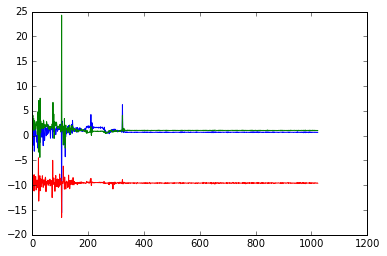

In [3]:
data = device.getNextWindow()
plotarray(data[1:4])

1.07228915663


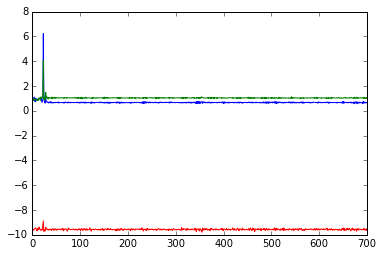

In [4]:
data = device.getSelection(300, 1000)
plotarray(data[1:4])
print data[1][0]


## Power Spectrum
I am using the welch method to estimate the power spectrum of the accelerometer signals.

In [43]:
from scipy import signal
data = device.getNextWindow()
fx, Pxx_denx = signal.welch(data[1], nperseg=device.windowSize)
fy, Pxx_deny = signal.welch(data[2], nperseg=device.windowSize)
fz, Pxx_denz = signal.welch(data[3], nperseg=device.windowSize)

plt.figure(1)
plotarray(data[1:4])
plt.figure(2)
plt.plot(fx,Pxx_denx)
plt.plot(fy,Pxx_deny)
plt.plot(fz,Pxx_denz)
plt.figure(3)
plt.semilogy(fx,Pxx_denx)
plt.semilogy(fy,Pxx_deny)
plt.semilogy(fz,Pxx_denz)



StopIteration: 

### Other People's Features
Zero Crossing Rate
Frequency Spectrum

In [6]:
device.getDeviceID()

'E887'

In [7]:
device.getUpdateRate()

51.25004574474305

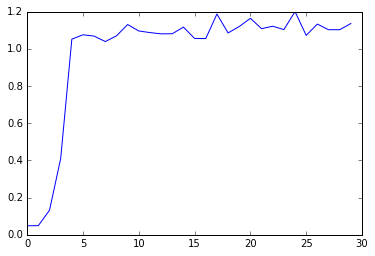

In [8]:
stdevs = []
for k in range(30):
    device.getNextWindow()
    stdevs.append(device.featureWindowStdev()[3])
    
plt.plot(range(len(stdevs)), stdevs)

In [9]:
import numpy as np
np.mean(data[3])

-9.5681475903614466

In [10]:
device.window

[[1457371403828.0,
  1457371403847.53,
  1457371403867.07,
  1457371403886.6,
  1457371403906.13,
  1457371403925.66,
  1457371403945.19,
  1457371403964.72,
  1457371403984.25,
  1457371404003.78,
  1457371404023.32,
  1457371404042.85,
  1457371404062.38,
  1457371404081.91,
  1457371404101.44,
  1457371404120.97,
  1457371404140.5,
  1457371404160.03,
  1457371404179.57,
  1457371404199.1,
  1457371404218.63,
  1457371404238.16,
  1457371404257.69,
  1457371404277.22,
  1457371404296.75,
  1457371404316.28,
  1457371404335.82,
  1457371404355.35,
  1457371404374.88,
  1457371404394.41,
  1457371404413.94,
  1457371404433.47,
  1457371404453.0,
  1457371404472.53,
  1457371404492.07,
  1457371404511.6,
  1457371404531.13,
  1457371404550.66,
  1457371404570.19,
  1457371404589.72,
  1457371404609.25,
  1457371404628.78,
  1457371404648.32,
  1457371404667.85,
  1457371404687.38,
  1457371404706.91,
  1457371404726.44,
  1457371404745.97,
  1457371404765.5,
  1457371404785.03,
  14573

Speed
Steps
Command Strips